<center><h1> Capstone Project <h1></center>

![](./house.jpg)

In [1]:
# imports 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import random
from IPython.core.display import HTML

In [2]:
# Load Data
path = './files/data/train_data.csv'
df = pd.read_csv(path)

## 1. Read in and explore the data

In [3]:
# explore the data 
df.head()

,price,neighborhood_name,administritive_area,city,rooms,bathrooms,sqm,elevator,bool,driver,garden
0,1300000.0,Al Munsiyah,Riyadh,East Riyadh,4,5,240.0,0,0,0,0
1,2500000.0,Al Murjan,Makkah,Jeddah,5,4,309.0,0,1,0,0
2,1300000.0,Ar Rimal,Riyadh,East Riyadh,5,5,300.0,0,0,0,0
3,1550000.0,Az Zomorod,Makkah,Jeddah,6,6,312.0,0,0,0,0
4,1000000.0,Ash Shifa,Riyadh,South Riyadh,4,3,300.0,0,0,0,0


In [4]:
# numeric data describtion
df.describe()

,price,rooms,bathrooms,sqm,elevator,bool,driver,garden
count,1.417000e+03,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000,1417.000000
mean,1.953098e+06,4.708539,5.143260,917.824277,0.220889,0.139026,0.148200,0.035286
std,5.369451e+06,1.198701,1.341935,14678.147391,0.446156,0.377334,0.361336,0.192067
min,1.110000e+02,1.000000,1.000000,22.000000,0.000000,0.000000,0.000000,0.000000
25%,1.050000e+06,4.000000,4.000000,268.000000,0.000000,0.000000,0.000000,0.000000
50%,1.300000e+06,5.000000,5.000000,312.000000,0.000000,0.000000,0.000000,0.000000
75%,1.750000e+06,5.000000,6.000000,390.000000,0.000000,0.000000,0.000000,0.000000
max,1.600000e+08,7.000000,7.000000,420000.000000,4.000000,3.000000,2.000000,2.000000


In [5]:
# categorical data describtion 
df.describe(exclude = 'number')

,neighborhood_name,administritive_area,city
count,1417,1396,1417
unique,123,2,13
top,Ar Rimal,Riyadh,East Riyadh
freq,268,1019,454


In [6]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                1417 non-null   float64
 1   neighborhood_name    1417 non-null   object 
 2   administritive_area  1396 non-null   object 
 3   city                 1417 non-null   object 
 4   rooms                1417 non-null   int64  
 5   bathrooms            1417 non-null   int64  
 6   sqm                  1417 non-null   float64
 7   elevator             1417 non-null   int64  
 8   bool                 1417 non-null   int64  
 9   driver               1417 non-null   int64  
 10  garden               1417 non-null   int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 121.9+ KB


<center><h3>Features description</h3></center>

<table>
  <thead>
    <tr>
      <th style="text-align:left;">Feature</th>
      <th style="text-align:left;"> Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="text-align:left;">price</td>
      <td style="text-align:left;"> Villa price</td>
    </tr>
    <tr>
      <td style="text-align:left;">neighborhood_name</td>
      <td style="text-align:left;"> Neighborhood name</td>
    </tr>
    <tr>
      <td style="text-align:left;">administritive_area</td>
      <td style="text-align:left;">Administrative area name</td>
    </tr>
    <tr>
      <td style="text-align:left;">city</td>
      <td style="text-align:left;"> City name</td>
    </tr>
    <tr>
      <td style="text-align:left;">rooms</td>
      <td style="text-align:left;"> Number of bedrooms in villa</td>
    </tr>
    <tr>
      <td style="text-align:left;">bathrooms</td>
      <td style="text-align:left;"> Number of bathrooms in villa</td>
    </tr>
    <tr>
      <td style="text-align:left;">sqm</td>
      <td style="text-align:left;"> Villa area in square meaters</td>
    </tr>
    <tr>
      <td style="text-align:left;">elevator</td>
      <td style="text-align:left;"> Check if there is elevator or no . 1:there is elevator 0:no elevator</td>
    </tr>
    <tr>
      <td style="text-align:left;">bool</td>
      <td style="text-align:left;"> Check if there is bool or no . 1:there is bool 0:no bool</td>
    </tr>
    <tr>
      <td style="text-align:left;">driver</td>
      <td style="text-align:left;"> Check if there is driver room or no . 1:there is driver room 0:no driver room</td>
    </tr>
    <tr>
      <td style="text-align:left;">garden</td>
      <td style="text-align:left;"> Check if there is garden or no . 1:there is garden 0:no garden</td>
    </tr>      
  </tbody>
</table>

## 2. Data Preprocessing

### I. Rename columns

In [7]:
# columns names 
df.columns

Index(['price', 'neighborhood_name', 'administritive_area', 'city', 'rooms',
       'bathrooms', 'sqm', 'elevator', 'bool', 'driver', 'garden'],
      dtype='object')

In [8]:
# rename column bool -> pool 
df.rename(columns={'bool':'pool'}, inplace = True)

In [9]:
# columns names 
df.columns

Index(['price', 'neighborhood_name', 'administritive_area', 'city', 'rooms',
       'bathrooms', 'sqm', 'elevator', 'pool', 'driver', 'garden'],
      dtype='object')

### II. Handle the spaces in the column values 

In [10]:
# city column values 
df['city'].unique()

array([' East Riyadh', ' Jeddah', ' South Riyadh', ' North Riyadh',
       ' West Riyadh', ' Al Riyadh', ' Al Kharj', ' Al Khubar',
       ' Ad Dammam', ' Afif', ' Khamis Mushayt', ' Downtown Riyadh',
       ' King Abdullah Economic City'], dtype=object)

In [11]:
# remove the spaces from the beggining of the values 
city = []
for x in range(len(df)):
    city.append(df.iloc[x]['city'].lstrip(' '))

df['city'] = city

In [12]:
# city column's values 
df['city'].unique()

array(['East Riyadh', 'Jeddah', 'South Riyadh', 'North Riyadh',
       'West Riyadh', 'Al Riyadh', 'Al Kharj', 'Al Khubar', 'Ad Dammam',
       'Afif', 'Khamis Mushayt', 'Downtown Riyadh',
       'King Abdullah Economic City'], dtype=object)

### III. Handle missing values

In [13]:
# check missing valuses 
df.isnull().sum()

price                   0
neighborhood_name       0
administritive_area    21
city                    0
rooms                   0
bathrooms               0
sqm                     0
elevator                0
pool                    0
driver                  0
garden                  0
dtype: int64

In [14]:
# unique values for the administritive_area column
df['administritive_area'].unique()

array(['Riyadh', 'Makkah', nan], dtype=object)

In [15]:
# replace the missing values in the administritive_area column 
administritive_area = []

for x in range(len(df)):
    
    if (df.iloc[x]['city'] == 'Ad Dammam') | (df.iloc[x]['city'] == 'Al Khubar'):
        administritive_area.append('Eastern Province')
        
    elif (df.iloc[x]['city'] == 'Khamis Mushayt'):
        administritive_area.append('Asir')
    else:
        administritive_area.append(df.iloc[x]['administritive_area'])

df['administritive_area'] = administritive_area

In [16]:
# unique values for the administritive_area column
df['administritive_area'].unique()

array(['Riyadh', 'Makkah', 'Eastern Province', 'Asir'], dtype=object)

In [17]:
# check missing valuses 
df.isnull().sum()

price                  0
neighborhood_name      0
administritive_area    0
city                   0
rooms                  0
bathrooms              0
sqm                    0
elevator               0
pool                   0
driver                 0
garden                 0
dtype: int64

### III. Handle the Incorrect Values in the columns

#### 1. price column

In [18]:
# sort and view the data based on the price column -- , ascending = False
df = df.sort_values(by = 'price')
df.head(10)

,price,neighborhood_name,administritive_area,city,rooms,bathrooms,sqm,elevator,pool,driver,garden
889,111.0,An Narjis,Riyadh,North Riyadh,4,7,350.0,0,0,1,0
50,770.0,Al Burj,Riyadh,Al Kharj,4,4,364.0,0,0,0,0
703,870.0,Al Hamadaniyah,Makkah,Jeddah,5,4,300.0,1,0,0,0
1394,950.0,As Salhiyah,Makkah,Jeddah,5,4,300.0,1,0,0,0
951,1600.0,Ar Rimal,Riyadh,East Riyadh,3,2,371.0,0,0,0,0
975,1900.0,Al Munsiyah,Riyadh,East Riyadh,5,4,337.0,0,0,0,0
971,2150.0,An Narjis,Riyadh,North Riyadh,3,2,399.0,0,0,0,0
920,2850.0,An Narjis,Riyadh,North Riyadh,5,4,450.0,0,0,0,0
768,100000.0,Abruq Ar Rughamah,Makkah,Jeddah,4,3,143.0,0,0,0,0
570,120000.0,An Narjis,Riyadh,North Riyadh,4,4,225.0,0,0,0,0


In [19]:
# handle the incorrect values 
def price(df, neighborhood):
    
    price_sum = 0 # store prices sum
    sqm_sum = 0 # store sqms sum
    price = [] # store new price column 
    
    # calculte the sum of prices and sqms
    for x in range(len(df)):
        if (df.iloc[x]['neighborhood_name'] == neighborhood) and (df.iloc[x]['price'] > 10000) or (df.iloc[x]['price'] < 100000000):
            price_sum += df.iloc[x]['price']
            sqm_sum += df.iloc[x]['sqm']
    
        
    # filling the new price []
    for x in range(len(df)):
        if (df.iloc[x]['neighborhood_name'] == neighborhood) and (df.iloc[x]['price'] < 10000) or (df.iloc[x]['price'] > 100000000):
            if(sqm_sum != 0):
                price_sqm = price_sum / sqm_sum
                price.append(round(price_sqm * df.iloc[x]['sqm'],2))
            else:
                price.append(0)
        else:
            price.append(df.iloc[x]['price'])

    return price


In [20]:
# call the price function
df['price'] = price(df,'An Narjis')
df['price'] = price(df,'Al Burj')
df['price'] = price(df,'Al Hamadaniyah')
df['price'] = price(df,'As Salhiyah')
df['price'] = price(df,'Ar Rimal')
df['price'] = price(df,'Al Munsiyah')
df['price'] = price(df,'Al Hazm')
df['price'] = price(df,'Abhur Ash Shamaliyah')

In [21]:
# drop the row : price = 0
df.drop(df.index[df['price'] == 0], inplace =True)

In [22]:
# sort and view the data based on the price column -- , ascending = False
df = df.sort_values(by = 'price')
df.head(10)

,price,neighborhood_name,administritive_area,city,rooms,bathrooms,sqm,elevator,pool,driver,garden
768,100000.00,Abruq Ar Rughamah,Makkah,Jeddah,4,3,143.0,0,0,0,0
570,120000.00,An Narjis,Riyadh,North Riyadh,4,4,225.0,0,0,0,0
1139,300000.00,Manfuhah Al Jadidah,Riyadh,Downtown Riyadh,2,3,215.0,0,0,0,0
1135,300000.00,Manfuhah Al Jadidah,Riyadh,Downtown Riyadh,2,3,215.0,0,0,0,0
769,400000.00,Abruq Ar Rughamah,Makkah,Jeddah,7,6,225.0,0,0,0,0
534,500000.00,Al Qadisiyah,Riyadh,East Riyadh,3,2,137.0,0,0,0,0
681,500000.00,Ghirnatah,Riyadh,East Riyadh,3,3,115.0,0,0,0,0
1164,578502.78,Abhur Ash Shamaliyah,Makkah,Jeddah,5,5,300.0,1,1,0,0
703,579196.81,Al Hamadaniyah,Makkah,Jeddah,5,4,300.0,1,0,0,0
1394,579330.21,As Salhiyah,Makkah,Jeddah,5,4,300.0,1,0,0,0


#### 2. sqm column 

In [23]:
# sort and view the data based on the sqm column -- , ascending = True
df = df.sort_values(by = 'sqm')
df.head(10)

,price,neighborhood_name,administritive_area,city,rooms,bathrooms,sqm,elevator,pool,driver,garden
1191,9000050.0,Ash Sheraa,Makkah,Jeddah,6,6,22.0,1,0,0,0
1266,9000050.0,Ash Sheraa,Makkah,Jeddah,6,6,22.0,1,0,0,0
681,500000.0,Ghirnatah,Riyadh,East Riyadh,3,3,115.0,0,0,0,0
1392,850000.0,Al Wahah,Makkah,Jeddah,5,3,135.0,0,0,1,0
534,500000.0,Al Qadisiyah,Riyadh,East Riyadh,3,2,137.0,0,0,0,0
666,630000.0,Ghirnatah,Riyadh,East Riyadh,3,3,140.0,0,0,0,0
768,100000.0,Abruq Ar Rughamah,Makkah,Jeddah,4,3,143.0,0,0,0,0
671,700000.0,Ghirnatah,Riyadh,East Riyadh,3,3,158.0,0,0,0,0
450,1600000.0,Al Faiha,Makkah,Jeddah,3,3,170.0,0,1,1,0
738,700000.0,Al Wahah,Makkah,Jeddah,5,4,171.0,1,0,0,0


In [24]:
# handle the incorrect values 
def sqm(df, neighborhood):
    
    price_sum = 0 # store prices sum
    sqm_sum = 0 # store sqms sum
    sqm=[] # store new price column
   
    # calculte the sum of prices and sqms
    for x in range(len(df)):
        if (df.iloc[x]['neighborhood_name'] == neighborhood) and (df.iloc[x]['sqm'] > 100) or (df.iloc[x]['sqm'] < 100000):
            price_sum += df.iloc[x]['price']
            sqm_sum += df.iloc[x]['sqm']
            
    # filling the new price []    
    for x in range(len(df)):  
        if (df.iloc[x]['neighborhood_name'] == neighborhood) and (df.iloc[x]['sqm'] < 100) or (df.iloc[x]['sqm'] > 100000):
            if(sqm_sum != 0):
                new_sqm = price_sum / sqm_sum
                new2=df.iloc[x]['price']/new_sqm
                sqm.append(round(new2,2))
            else:
                sqm.append(0)
        else:
            sqm.append(df.iloc[x]['sqm'])

    return sqm

In [25]:
# call sqm function 
df['sqm']= sqm(df,'Ash Sheraa')
df['sqm']= sqm(df,'Al Munsiyah')
df['sqm']= sqm(df,'Badr')

In [26]:
# sort and view the data based on the sqm column -- , ascending = True
df = df.sort_values(by = 'sqm')
df.head(10)

,price,neighborhood_name,administritive_area,city,rooms,bathrooms,sqm,elevator,pool,driver,garden
681,500000.0,Ghirnatah,Riyadh,East Riyadh,3,3,115.0,0,0,0,0
1392,850000.0,Al Wahah,Makkah,Jeddah,5,3,135.0,0,0,1,0
534,500000.0,Al Qadisiyah,Riyadh,East Riyadh,3,2,137.0,0,0,0,0
666,630000.0,Ghirnatah,Riyadh,East Riyadh,3,3,140.0,0,0,0,0
768,100000.0,Abruq Ar Rughamah,Makkah,Jeddah,4,3,143.0,0,0,0,0
671,700000.0,Ghirnatah,Riyadh,East Riyadh,3,3,158.0,0,0,0,0
450,1600000.0,Al Faiha,Makkah,Jeddah,3,3,170.0,0,1,1,0
738,700000.0,Al Wahah,Makkah,Jeddah,5,4,171.0,1,0,0,0
1232,690000.0,Al Yarmuk,Riyadh,East Riyadh,3,3,192.0,0,0,0,0
1054,1000000.0,Al Qadisiyah,Riyadh,East Riyadh,5,5,200.0,0,0,0,0


###### Work precentage (Mram: 10, Nouf: 20, Norah Alharthi: 20, Nourah Alsaadan: 50)

## 3. EDAs 

In [27]:
# center the images
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### I. Histogram: Cities based on the Administrative Area

Text(0.5, 1.0, 'Cities based on the Administrative Area\n')

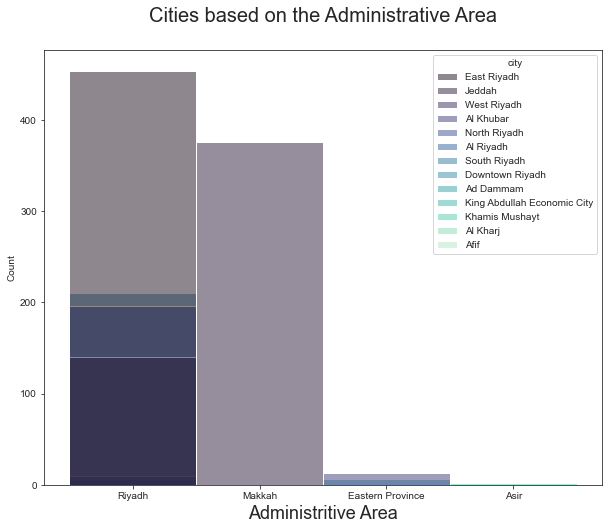

In [28]:
plt.figure(figsize=(10,8))
sns.set_style("ticks")

x=sns.histplot(x="administritive_area", hue="city", data=df, palette="mako")

x.set_xlabel ("Administritive Area",fontsize=18)
x.set_title ("Cities based on the Administrative Area\n", fontsize=20)

<h4><center> This histogram shows cities based on the administrative areas </center></h4>
<center> Most of the villas in the dataset are based in Makkah and Riyadh </center>

### II. Donut chart: The Percentage of the Area in each Administrative Area

In [29]:
#groupby the data by delivery type
data = df.groupby("administritive_area")['sqm'].mean()
data

administritive_area
Asir                357.500000
Eastern Province    698.894737
Makkah              383.490928
Riyadh              359.420334
Name: sqm, dtype: float64

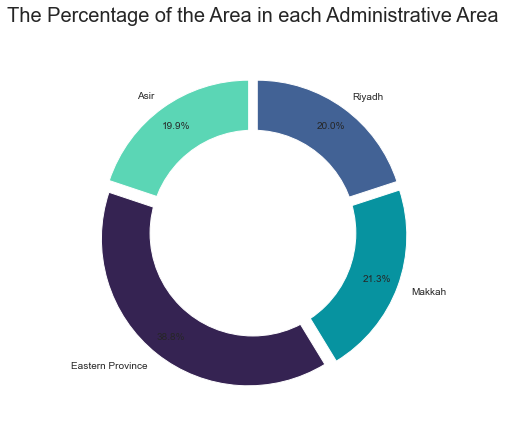

In [30]:
#Using matplotlib
fig1, ax1 = plt.subplots(figsize=[10,6])
labels = data.keys()
explode = (0.05,0.05,0.05,0.05)
colors = ['#5BD6B5','#352352','#0793A0','#426295']
plt.pie(x=data, autopct="%1.1f%%", explode=explode, labels=labels,colors = colors, startangle=90, pctdistance=0.85)
plt.title("The Percentage of the Area in each Administrative Area\n", fontsize=20);
# pie.savefig("DeliveryPieChart.png")

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
#ax.axis('equal')  
plt.tight_layout()
plt.show()

<h4><center> This donut chart shows the percentage of the area in each administrative area </center></h4>
<center> The areas of the villas in the Eastern province are bigger than the other provinces </center>

### III.  Subplot of barplots: Rooms, Bathrooms, Elevator , and Pool based on Administrative Area

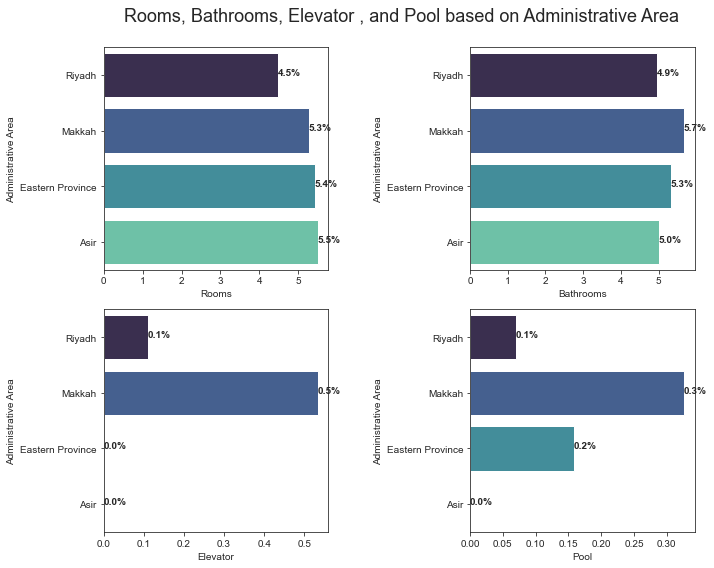

In [31]:
# subplot
bar,ax = plt.subplots(figsize=(10,8))
sns.set_style("ticks")

# plot 1:
plt.subplot(2, 2, 1) # 2x2 plot with plot position 1 (upper left)
ax = sns.barplot(x="rooms", y="administritive_area", data=df, ci=None, palette="mako"
                 ,orient='h')
ax.set_title("    Rooms, Bathrooms, Elevator , and Pool based on Administrative Area\n", fontsize=18, loc='left')
ax.set_xlabel ("Rooms")
ax.set_ylabel ("Administrative Area")

for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )
bar.savefig("Seaborn_Bar_Vertical.png");


# plot 2:
plt.subplot(2, 2, 2) # 2x2 plot with plot position 2 (upper right)
ax = sns.barplot(x="bathrooms", y="administritive_area", data=df, ci=None, palette="mako"
,orient='h' )
ax.set_xlabel ("Bathrooms")
ax.set_ylabel ("Administrative Area")

for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )
bar.savefig("Seaborn_Bar_Vertical.png");

# plot 3:
plt.subplot(2,2,3) # 2x2 plot with plot position 2 (lower left)
ax = sns.barplot(x="elevator", y="administritive_area", data=df, ci=None, palette="mako"
,orient='h' )
ax.set_xlabel ("Elevator")
ax.set_ylabel ("Administrative Area")

for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )
bar.savefig("Seaborn_Bar_Vertical.png");

# plot 4:
plt.subplot(2,2,4) # 2x2 plot with plot position 2 (lower right)
ax = sns.barplot(x="pool", y="administritive_area", data=df, ci=None, palette="mako"
,orient='h' )
ax.set_xlabel ("Pool")
ax.set_ylabel ("Administrative Area")

for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )
bar.savefig("Seaborn_Bar_Vertical.png");

plt.tight_layout() 
plt.show()

<h4><center> This subplot shows the Rooms, Bathrooms, Elevator , and Pool based on administrative area </center></h4>
<center> The number of rooms in Asir is higher than the other provinces </center>
<center> The number of elevators in Makkah is the highest, Riyadh have some, and there are no elevators in Eastren province or Asir</center>
<center> The number of pools in Makkah is the highest, there are no pools in Asir </center>

### IV. Scatterplot: The Relationships between Price and Area

Text(0.5, 1.0, 'The Relationship between Price and Area\n')

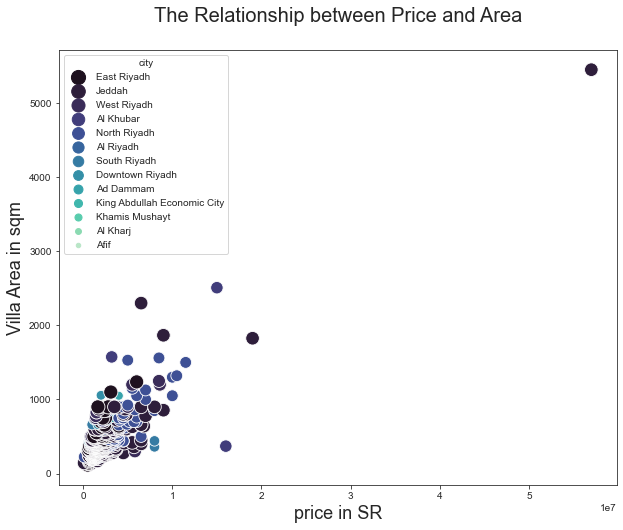

In [32]:
plt.figure(figsize=(10,8))
sns.set_style("ticks")

u=sns.scatterplot(
    data=df, x="price", y="sqm", hue="city", palette="mako",size="city",
    sizes=(20, 200), legend="full" 
)
u.set_xlabel ("price in SR",fontsize=18)
u.set_ylabel ("Villa Area in sqm", fontsize=18)
u.set_title ("The Relationship between Price and Area\n", fontsize=20)


<h4><center> This scatterplot shows the relationship between price and area </center></h4>
<center> There is a strong relationship between the price and area </center>
<center> Note: the prices are ascending by 10,000,000 </center>

### V.  Line Plot: Price per Each Administritive Area

In [33]:
#filter the sqm by get value BTW (300 - 700)
def getNew_sqm (df):
    new_df = pd.DataFrame()  
    for x in range(len(df["sqm"])):
        if (df.iloc[x]["sqm"] > 300) and (df.iloc[x]["sqm"] < 700):
            new_sqm=df.iloc[x]["sqm"]
            new_price=df.iloc[x]["price"]
            new_adm= df.iloc[x]["administritive_area"]
            new_room= df.iloc[x]["rooms"]
            new_bathrooms= df.iloc[x]["bathrooms"]
            new_elevator= df.iloc[x]["elevator"]
            new_pool= df.iloc[x]["pool"]
            new_driver= df.iloc[x]["driver"]
            new_garden= df.iloc[x]["garden"]
            new_city= df.iloc[x]["city"]
            new_nei= df.iloc[x]["neighborhood_name"]
            
            
            
            new_df = new_df.append({'sqm': new_sqm, 'price': new_price, 'administritive_area': new_adm,'rooms':new_room,'bathrooms':new_bathrooms,'elevator':new_elevator,'pool':new_pool,'driver':new_driver,'garden':new_garden,'city':new_city,'neighborhood_name':new_nei}, ignore_index=True)
    return new_df

In [34]:
#The new filtred dataset to show the mean OF price in Each Administrative Area based on sqm range(300-700) 
filtred_data= getNew_sqm(df)
filtred_data.head()

,administritive_area,bathrooms,city,driver,elevator,garden,neighborhood_name,pool,price,rooms,sqm
0,Riyadh,4.0,East Riyadh,0.0,0.0,0.0,Al Munsiyah,0.0,1650000.0,5.0,302.0
1,Riyadh,6.0,North Riyadh,1.0,0.0,1.0,Al Yasmin,1.0,2400000.0,3.0,303.0
2,Riyadh,4.0,North Riyadh,1.0,1.0,0.0,An Narjis,0.0,1900000.0,4.0,306.0
3,Riyadh,4.0,South Riyadh,0.0,0.0,0.0,Badr,0.0,1050000.0,3.0,306.0
4,Riyadh,4.0,North Riyadh,0.0,0.0,0.0,Al Arid,0.0,1480000.0,5.0,308.0


In [35]:
GROUP= filtred_data.groupby('administritive_area').mean()

Text(0.5, 1.0, "The mean of price's in Each Administrative Area Based on square meter range (300-700)\n")

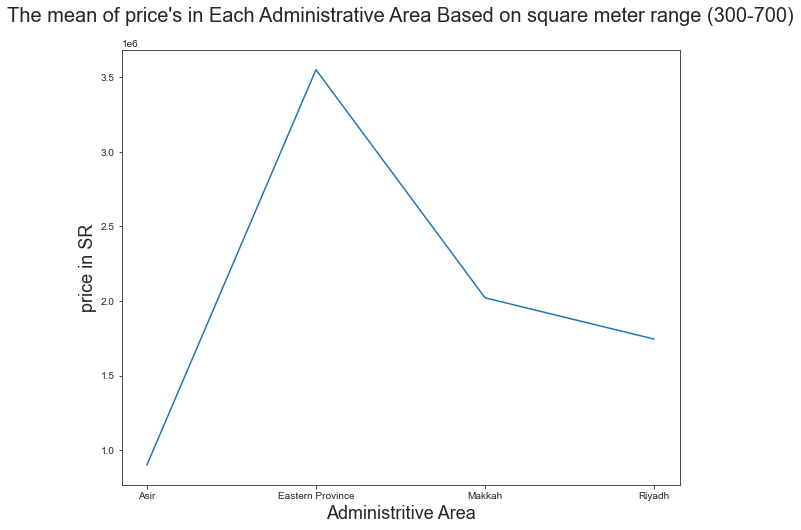

In [36]:
# Plot Price per Each Administritive Area
plt.figure(figsize=(10,8))
plt.plot(GROUP.index, GROUP['price'])
plt.xlabel("Administritive Area", fontsize=18)
plt.ylabel("price in SR", fontsize=18)
plt.title("The mean of price's in Each Administrative Area Based on square meter range (300-700)\n", fontsize=20)

<h4><center> This Line Plot shows the mean of prices in each administrative area </center></h4>
<center> The Eastern province have the highest prices, which is obvious since the area's of the villas are bigger </center>
<center> Asir's prices are the lowest, and obviously it's because Asir is not one of the main provinces in SA </center>
<center> Note: the prices are ascending by 1,000,000 </center>

### VI.  Line Plot: Price per Cities

In [37]:
# Grouping by city
GROUP_1=filtred_data.groupby(pd.Grouper(key='city')).mean()
GROUP_1

,bathrooms,driver,elevator,garden,pool,price,rooms,sqm
city,,,,,,,,
East Riyadh,4.546512,0.104651,0.034884,0.011628,0.063953,1.500888e+06,4.430233,382.142267
North Riyadh,5.574803,0.259843,0.448819,0.062992,0.283465,2.796788e+06,4.850394,436.299213
South Riyadh,4.428571,0.008929,0.026786,0.000000,0.008929,1.112827e+06,3.642857,371.044643
Jeddah,6.000000,0.238806,0.502488,0.064677,0.353234,2.023567e+06,5.447761,385.616915
West Riyadh,5.300000,0.128571,0.100000,0.028571,0.042857,1.493286e+06,4.514286,409.114286
King Abdullah Economic City,5.000000,1.000000,0.000000,0.000000,0.000000,1.450000e+06,5.000000,330.000000
Khamis Mushayt,5.000000,0.000000,0.000000,0.000000,0.000000,9.000000e+05,5.500000,357.500000
Al Khubar,4.500000,0.333333,0.000000,0.166667,0.000000,4.133333e+06,4.666667,468.333333
Al Riyadh,4.200000,0.000000,0.000000,0.000000,0.000000,1.500000e+06,3.800000,432.000000


Text(0.5, 1.0, "The mean of Price's in Each City\n")

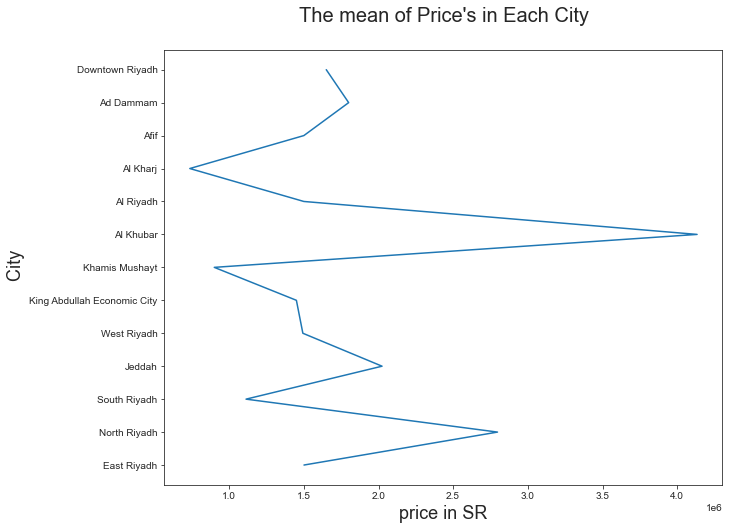

In [38]:
# Plot Price per Each City
plt.figure(figsize=(10,8))
plt.plot(GROUP_1['price'], GROUP_1.index)
plt.xlabel("price in SR", fontsize=18)
plt.ylabel(" City",fontsize=18 )
plt.title("The mean of Price's in Each City\n", fontsize=20)

<h4><center> This Line Plot shows the mean of price's in Each City </center></h4>
<center> Ad Dammam and Al Khubar prices are the highest </center>
<center> North Riyadh prices is higher than the west, east and south, and it's the highest in Riyadh</center>
<center> For Makkah province, Jeddah prices is the highest </center>
<center> Note: the prices are ascending by 1,000,000 </center>

###### Work precentage (Mram: 10, Nouf: 40, Norah Alharthi: 40, Nourah Alsaadan: 10)